In [1]:
#import necessary libaries for data cleaning, visualization, geospatial mapping and machine learning preprocessing tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

!pip install folium
import folium
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [2]:
#importing loan performance dataset & naming it df1
df1= pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv')

In [3]:
df1.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

                 approveddate                creationdate  loanamount  \
0  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
1  2017-07-05 17:04:41.000000  2017-07-05 16:04:18.000000     15000.0   
2  2017-07-06 14:52:57.000000  2017-07-06 13:52:51.000000     20000.0   
3  2017-07-27 19:00:41.000000  2017-07-27 18:00:35.000000     10000.0   
4  2017-07-03 23:42:45.000000  2017-07-03 22:42:39.000000     40000.0   

   totaldue  termdays referredby good_bad_flag  
0   34500.0        30        NaN          Good  
1   17250.0        30        NaN          Good  
2   22250.0        15        NaN          Good  
3   11500.0        15        NaN          Good  
4   44000.0        30        NaN          Good

In [4]:
#to check for missing values
df1.isna().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [5]:
#to check %missing values of each column
df1.isna().sum().sort_values(ascending=False)/len(df1)*100

referredby       86.561355
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
approveddate      0.000000
creationdate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64

I'm going to be dropping the referred by column because it has more than 80% missing values

In [6]:
df1.drop(columns=['referredby'], inplace=True)

In [7]:
#to check for duplicates
df1.duplicated().sum()

0

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 307.3+ KB


In [9]:
#changing dtypes for approveddate and creationdate to appropriate dtype
df1['approveddate'] = pd.to_datetime(df1['approveddate'])
df1['creationdate'] = pd.to_datetime(df1['creationdate'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   int64         
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 307.3+ KB


In [11]:
df1.shape

(4368, 9)

In [12]:
#imported the demographic dataset and named it df2
df2= pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv')

In [13]:
df2.head(1)

customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  
0                 NaN                       NaN                        NaN

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [15]:
#change dtypes
df2['birthdate'] = pd.to_datetime(df2['birthdate'], errors='coerce')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4346 non-null   object        
 1   birthdate                   4346 non-null   datetime64[ns]
 2   bank_account_type           4346 non-null   object        
 3   longitude_gps               4346 non-null   float64       
 4   latitude_gps                4346 non-null   float64       
 5   bank_name_clients           4346 non-null   object        
 6   bank_branch_clients         51 non-null     object        
 7   employment_status_clients   3698 non-null   object        
 8   level_of_education_clients  587 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 305.7+ KB


In [17]:
df2.isna().sum().sort_values(ascending=False)/len(df2)*100

bank_branch_clients           98.826507
level_of_education_clients    86.493327
employment_status_clients     14.910262
customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
dtype: float64

In [18]:
#dropping columns with missing values >80%
df2.drop(columns=['bank_branch_clients', 'level_of_education_clients'], inplace=True)

In [19]:
df2.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients'],
      dtype='object')

In [20]:
#filling missing values
df2['employment_status_clients'].fillna('unknown', inplace=True)

In [21]:
df2.isna().sum().sort_values(ascending=False)/len(df2)*100

customerid                   0.0
birthdate                    0.0
bank_account_type            0.0
longitude_gps                0.0
latitude_gps                 0.0
bank_name_clients            0.0
employment_status_clients    0.0
dtype: float64

In [22]:
#check for duplicates
df2.duplicated().sum()

12

In [23]:
#dropping duplicates
df2.drop_duplicates(inplace=True)

In [24]:
df2.duplicated().sum()

0

In [25]:
df2.shape

(4334, 7)

In [26]:
#importing the previous loans dataset & naming it df3
df3= pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv')

In [27]:
df3.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

                 approveddate                creationdate  loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000     10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000     10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000     20000.0   
3  2017-04-09 18:25:55.000000  2017-04-09 17:25:42.000000     10000.0   
4  2017-06-17 09:29:57.000000  2017-06-17 08:29:50.000000     10000.0   

   totaldue  termdays                  closeddate referredby  \
0   13000.0        30  2016-09-01 16:06:48.000000        NaN   
1   13000.0        30  2017-05-28 14:44:49.000000        NaN   
2   23800.0        30  2017-04-26 22:18:56.000000        NaN   
3   11500.0        15  2017-04-24 01:35:52.000000        NaN   
4   11500.0        15  2017-07-14 21:18:43.000000        NaN   

                 firstduedate             firstrepaiddate  
0  2016-09-14 00:00:00.000000  2016-09-01 15:51:43.000000  
1  2017-05-30 00:00:00.000000  2017-05-26 00:00:00.000000  
2  2017-04-04 00:00:00.000000  2017-04-26 22:03:47.000000  
3  2017-04-24 00:00:00.000000  2017-04-24 00:48:43.000000  
4  2017-07-03 00:00:00.000000  2017-07-14 21:08:35.000000

In [28]:
df3.shape

(18183, 12)

In [29]:
#to check for % of missing values
df3.isna().sum().sort_values(ascending=False)/len(df3)*100

referredby         94.357367
customerid          0.000000
systemloanid        0.000000
loannumber          0.000000
approveddate        0.000000
creationdate        0.000000
loanamount          0.000000
totaldue            0.000000
termdays            0.000000
closeddate          0.000000
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64

In [30]:
#drop column that has missing values > 80%
df3.drop(columns=['referredby'], inplace=True)

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   firstduedate     18183 non-null  object 
 10  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


In [32]:
#converting wrong dtypes for dates to appropriate dtypes
date_cols = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']

for col in date_cols:
    df3[col] = pd.to_datetime(df3[col])

In [33]:
df3.duplicated().sum()

0

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   firstduedate     18183 non-null  datetime64[ns]
 10  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


**Feature Engineering**

In [35]:
#feature creation
df3['delaydays'] =(df3['firstrepaiddate'] - df3['firstduedate']).dt.days

df3['interestrate'] = df3['totaldue'] - df3['loanamount']/ df3['loanamount']

df3['loandurationdays'] = (df3['closeddate'] - df3['approveddate']).dt.days

df3["ontimerepayment"] = (df3["firstrepaiddate"] <= df3["firstduedate"]).astype(int)


In [36]:
df3.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2016-08-15 18:22:40 2016-08-15 17:22:32     10000.0   13000.0        30   
1 2017-04-28 18:39:07 2017-04-28 17:38:53     10000.0   13000.0        30   
2 2017-03-05 10:56:25 2017-03-05 09:56:19     20000.0   23800.0        30   
3 2017-04-09 18:25:55 2017-04-09 17:25:42     10000.0   11500.0        15   
4 2017-06-17 09:29:57 2017-06-17 08:29:50     10000.0   11500.0        15   

           closeddate firstduedate     firstrepaiddate  delaydays  \
0 2016-09-01 16:06:48   2016-09-14 2016-09-01 15:51:43        -13   
1 2017-05-28 14:44:49   2017-05-30 2017-05-26 00:00:00         -4   
2 2017-04-26 22:18:56   2017-04-04 2017-04-26 22:03:47         22   
3 2017-04-24 01:35:52   2017-04-24 2017-04-24 00:48:43          0   
4 2017-07-14 21:18:43   2017-07-03 2017-07-14 21:08:35         11   

   interestrate  loandurationdays  ontimerepayment  
0       12999.0                16                1  
1       12999.0                29                1  
2       23799.0                52                0  
3       11499.0                14                0  
4       11499.0                27                0

In [37]:
#aggregating features of the dataset
df3_agg = df3.groupby('customerid').agg(
    total_prev_loans = ('systemloanid', 'count'),          #total number of loan(s) taken by a customer previously
    total_loanamt = ('loanamount', 'sum'),                 #total amount loaned previously
    avg_loanamt = ('loanamount', 'mean'),             #average amount loaned previously
    max_loanamt = ('loanamount', 'max'),                   #max amount loaned previously
    total_ontimerepayment = ('ontimerepayment', 'sum'),    #total ontime payment for previous loan(s)
    avg_interestrate = ('interestrate', 'mean'),           #average prev_loans interest rate
    avg_loandurationdays = ('loandurationdays', 'mean'),   #average duration days of previous loans
    avg_delaydays = ('delaydays', 'mean'),                 #average delay days of previous loans
    max_delaydays = ('delaydays', 'max')                   #maximum days a customer has delayed payment previously
    ).reset_index()

In [38]:
print(df3_agg.head())

                         customerid  total_prev_loans  total_loanamt  \
0  8a1088a0484472eb01484669e3ce4e0b                 1        10000.0   
1  8a1a1e7e4f707f8b014f797718316cad                 4        70000.0   
2  8a1a32fc49b632520149c3b8fdf85139                 7        90000.0   
3  8a1eb5ba49a682300149c3c068b806c7                 8       130000.0   
4  8a1edbf14734127f0147356fdb1b1eb2                 2        20000.0   

    avg_loanamt  max_loanamt  total_ontimerepayment  avg_interestrate  \
0  10000.000000      10000.0                      0      11499.000000   
1  17500.000000      30000.0                      2      22374.000000   
2  12857.142857      20000.0                      3      15213.285714   
3  16250.000000      30000.0                      6      20299.000000   
4  10000.000000      10000.0                      1      12249.000000   

   avg_loandurationdays  avg_delaydays  max_delaydays  
0             22.000000       6.000000              6  
1             31

In [39]:
df3_agg.shape

(4359, 10)

In [40]:
df3_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerid             4359 non-null   object 
 1   total_prev_loans       4359 non-null   int64  
 2   total_loanamt          4359 non-null   float64
 3   avg_loanamt            4359 non-null   float64
 4   max_loanamt            4359 non-null   float64
 5   total_ontimerepayment  4359 non-null   int32  
 6   avg_interestrate       4359 non-null   float64
 7   avg_loandurationdays   4359 non-null   float64
 8   avg_delaydays          4359 non-null   float64
 9   max_delaydays          4359 non-null   int64  
dtypes: float64(6), int32(1), int64(2), object(1)
memory usage: 323.6+ KB


In [41]:
df3_agg.duplicated().sum()

0

In [42]:
#to find customer data that are unique to each dataset before merging
customer_ids_df1 = set(df1['customerid'])
customer_ids_df2 = set(df2['customerid'])
customer_ids_df3 = set(df3['customerid'])
#customerid present in df1 but not in df2 and df3
unique_to_df1 = customer_ids_df1 - customer_ids_df2 - customer_ids_df3

#customerid present in df2 but not in df1 and df3
unique_to_df2 = customer_ids_df2 - customer_ids_df1 - customer_ids_df3

#customerid present in df3 but not in df1 and df2
unique_to_df3 = customer_ids_df3 - customer_ids_df1 - customer_ids_df2

#converting the sets to dataframe
unique_df1 = df1[df1['customerid'].isin(unique_to_df1)]
unique_df2 = df2[df2['customerid'].isin(unique_to_df2)]
unique_df3 = df3[df3['customerid'].isin(unique_to_df3)] 

In [43]:
unique_df1.shape

(4, 9)

In [44]:
unique_df2.shape

(1065, 7)

In [45]:
unique_df3.shape

(0, 15)

What the information above tells us is that df1(performance dataset) has 4 unique customerid, this could mean that these customers are new customers with no previous loan history and they didn't fill in their demographic information properly. For df2(demographic dataset), it has 1065 unique customerids, this tells us that this 1065 customers filled in some of their information but did not complete the process to take out a loan, informations like systemloanid is not registered for them. The df3(previous loan dataset) has no unique customerids.

In [46]:
#merging df1 and df2

In [47]:
df1_2 = pd.merge(df1,df2, on='customerid', how='outer')

In [48]:
df1_2.shape

(5433, 15)

In [49]:
#merging df1_2 and df3
df = pd.merge(df1_2,df3_agg, on='customerid', how='left')

In [99]:
df.head(10)

customerid  systemloanid  loannumber  \
0   8a1088a0484472eb01484669e3ce4e0b   301999397.0         2.0   
1   8a1a1e7e4f707f8b014f797718316cad   301997672.0         5.0   
2   8a1a32fc49b632520149c3b8fdf85139   301976551.0         8.0   
3   8a1eb5ba49a682300149c3c068b806c7   301975382.0         9.0   
4   8a1edbf14734127f0147356fdb1b1eb2   301979352.0         3.0   
5   8a26bd845089f1d7015090b1d6f53bad   301997559.0        10.0   
7   8a2a81a74ce8c05d014cfb32a0da1049   301994762.0        12.0   
8   8a2ac4745091002b0150a144bcbe58b7   302003167.0         8.0   
9   8a2ad9ce4c453e06014c4b3175e52407   301979367.0         3.0   
10  8a33a06e4a5075c2014a5295aa0c2224   301984436.0         9.0   

          approveddate        creationdate  loanamount  totaldue  termdays  \
0  2017-07-27 19:44:08 2017-07-27 18:44:00     10000.0   11500.0      15.0   
1  2017-07-26 20:01:54 2017-07-26 19:01:46     30000.0   39000.0      60.0   
2  2017-07-13 19:22:15 2017-07-13 18:22:05     20000.0   24500.0      30.0   
3  2017-07-13 00:34:03 2017-07-12 23:33:54     30000.0   39000.0      60.0   
4  2017-07-15 16:02:04 2017-07-15 15:01:56     10000.0   11500.0      15.0   
5  2017-07-26 18:49:30 2017-07-26 17:49:23     20000.0   24500.0      30.0   
7  2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0      30.0   
8  2017-07-30 09:25:21 2017-07-30 08:24:10     40000.0   48000.0      60.0   
9  2017-07-15 16:19:38 2017-07-15 15:19:31     20000.0   24500.0      30.0   
10 2017-07-18 18:44:17 2017-07-18 17:44:11     20000.0   24500.0      30.0   

    good_bad_flag bank_account_type  ...   bank_name_clients  \
0               0           Savings  ...             GT Bank   
1               1             Other  ...  Standard Chartered   
2               1           Savings  ...             GT Bank   
3               1           Savings  ...          First Bank   
4               1           Unknown  ...             Unknown   
5               1             Other  ...         Access Bank   
7               1             Other  ...        Diamond Bank   
8               1           Unknown  ...             Unknown   
9               1           Current  ...             EcoBank   
10              0           Savings  ...             GT Bank   

    employment_status_clients total_prev_loans total_ontimerepayment  \
0                   Permanent              1.0                   0.0   
1                   Permanent              4.0                   2.0   
2                   Permanent              7.0                   3.0   
3                   Permanent              8.0                   6.0   
4                     Unknown              2.0                   1.0   
5                   Permanent              9.0                   4.0   
7                   Permanent             11.0                   7.0   
8                     Unknown              7.0                   6.0   
9                   Permanent              1.0                   1.0   
10                  Permanent              8.0                   3.0   

    avg_loandurationdays  avg_delaydays  max_delaydays   age  age_missing  \
0              22.000000       6.000000            6.0  36.0            0   
1              31.250000      -0.250000            1.0  46.0            0   
2              18.285714      -0.428571            1.0  46.0            0   
3              28.500000      -3.125000            8.0  47.0            0   
4              18.000000      -4.000000            0.0  40.0            1   
5              30.666667       3.000000           30.0  38.0            0   
7              29.454545      -0.909091           39.0  53.0            0   
8              38.000000      -2.714286            0.0  40.0            1   
9              29.000000      -3.000000           -3.0  51.0            0   
10             25.375000      -0.875000           16.0  48.0            0   

    location_missing  
0                  0  
1                  0  
2                  0  
3 

In [51]:
df.shape

(5433, 24)

In [52]:
df.isna().sum()

customerid                      0
systemloanid                 1065
loannumber                   1065
approveddate                 1065
creationdate                 1065
loanamount                   1065
totaldue                     1065
termdays                     1065
good_bad_flag                1065
birthdate                    1099
bank_account_type            1099
longitude_gps                1099
latitude_gps                 1099
bank_name_clients            1099
employment_status_clients    1099
total_prev_loans             1074
total_loanamt                1074
avg_loanamt                  1074
max_loanamt                  1074
total_ontimerepayment        1074
avg_interestrate             1074
avg_loandurationdays         1074
avg_delaydays                1074
max_delaydays                1074
dtype: int64

In [53]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

latitude_gps                 20.228235
employment_status_clients    20.228235
birthdate                    20.228235
bank_account_type            20.228235
longitude_gps                20.228235
bank_name_clients            20.228235
avg_delaydays                19.768084
avg_loandurationdays         19.768084
avg_interestrate             19.768084
total_ontimerepayment        19.768084
max_loanamt                  19.768084
avg_loanamt                  19.768084
total_loanamt                19.768084
total_prev_loans             19.768084
max_delaydays                19.768084
systemloanid                 19.602430
good_bad_flag                19.602430
termdays                     19.602430
totaldue                     19.602430
loanamount                   19.602430
creationdate                 19.602430
approveddate                 19.602430
loannumber                   19.602430
customerid                    0.000000
dtype: float64

FROM the above information, I will be dropping all rows with missing systemloanid, this is because the customers have no registered loan in the data therefore, does not provide the needed information

In [54]:
df = df.dropna(subset=['systemloanid'])

In [55]:
df.isna().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type            1099
longitude_gps                1099
latitude_gps                 1099
bank_name_clients            1099
employment_status_clients    1099
total_prev_loans                9
total_loanamt                   9
avg_loanamt                     9
max_loanamt                     9
total_ontimerepayment           9
avg_interestrate                9
avg_loandurationdays            9
avg_delaydays                   9
max_delaydays                   9
dtype: int64

In [56]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

latitude_gps                 25.160256
employment_status_clients    25.160256
birthdate                    25.160256
bank_account_type            25.160256
longitude_gps                25.160256
bank_name_clients            25.160256
avg_delaydays                 0.206044
avg_loandurationdays          0.206044
avg_interestrate              0.206044
total_ontimerepayment         0.206044
max_loanamt                   0.206044
avg_loanamt                   0.206044
total_loanamt                 0.206044
total_prev_loans              0.206044
max_delaydays                 0.206044
systemloanid                  0.000000
good_bad_flag                 0.000000
termdays                      0.000000
totaldue                      0.000000
loanamount                    0.000000
creationdate                  0.000000
approveddate                  0.000000
loannumber                    0.000000
customerid                    0.000000
dtype: float64

From  the information above, I observed that 1099 customers didn't properly fill in their demographic information, i thought of dropping these columns but decided against it because those customers have valid loans since they have systemloanid and even good_bad_flag. dropping these rows will make us lose about 26% of our training data, so i decided to fill in these columns, create a flag for it so our model still knows that those information are missing and use it for training, only dropping the rows when i want to plot the location using the longitude and latitude information.

In [57]:
df_map = df.dropna(subset=['longitude_gps', 'latitude_gps'])

In [58]:
df_map.isna().sum()

customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
total_prev_loans             5
total_loanamt                5
avg_loanamt                  5
max_loanamt                  5
total_ontimerepayment        5
avg_interestrate             5
avg_loandurationdays         5
avg_delaydays                5
max_delaydays                5
dtype: int64

In [59]:
m = folium.Map(
    location = [df_map['latitude_gps'].mean(), df_map['longitude_gps'].mean()], 
    zoom_start=6)

for _, row in df_map.iterrows():
    folium.CircleMarker(
       location=[row['latitude_gps'], row['longitude_gps']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"CustomerID: {row['customerid']}"
    ).add_to(m)
    
display(m)

I created an interactive map using Folium to visualize customer distribution by location. Each blue circle represents a customer, and I included popups with their ID. This tells me most of the borrowers are located in Africa(Nigeria).

In [60]:
#creating a new col age from birthdate
from datetime import datetime
current_year = datetime.today().year
df['age'] = current_year - df['birthdate'].dt.year

In [61]:
df['age'].unique()

array([36., 46., 47., nan, 38., 53., 51., 48., 39., 41., 42., 37., 34.,
       55., 40., 45., 50., 44., 33., 43., 49., 35., 32., 57., 31., 52.,
       30., 58., 56., 54., 61., 63., 60., 59., 29., 64., 62.])

In [62]:
#drop birthdate
df.drop(columns=['birthdate'], inplace=True)

In [63]:
df['age_missing'] = df['age'].isna().astype(int)
df['location_missing'] = (df['longitude_gps'].isna() | df['latitude_gps'].isna()).astype(int)

In [64]:
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'total_prev_loans',
       'total_loanamt', 'avg_loanamt', 'max_loanamt', 'total_ontimerepayment',
       'avg_interestrate', 'avg_loandurationdays', 'avg_delaydays',
       'max_delaydays', 'age', 'age_missing', 'location_missing'],
      dtype='object')

In [65]:
df['location_missing'].unique()

array([0, 1])

In [66]:
df.isna().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
bank_account_type            1099
longitude_gps                1099
latitude_gps                 1099
bank_name_clients            1099
employment_status_clients    1099
total_prev_loans                9
total_loanamt                   9
avg_loanamt                     9
max_loanamt                     9
total_ontimerepayment           9
avg_interestrate                9
avg_loandurationdays            9
avg_delaydays                   9
max_delaydays                   9
age                          1099
age_missing                     0
location_missing                0
dtype: int64

In [67]:
#fill missing categorical column with unknown
for col in ['bank_account_type', 'bank_name_clients', 'employment_status_clients']:
    df[col].fillna('Unknown', inplace=True)

In [68]:
#filling missing numerical column
df['age'].fillna(df['age'].median(), inplace=True)
df['longitude_gps'].fillna(0, inplace=True)
df['latitude_gps'].fillna(0, inplace=True)

In [69]:
df.isna().sum()

customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
total_prev_loans             9
total_loanamt                9
avg_loanamt                  9
max_loanamt                  9
total_ontimerepayment        9
avg_interestrate             9
avg_loandurationdays         9
avg_delaydays                9
max_delaydays                9
age                          0
age_missing                  0
location_missing             0
dtype: int64

In [70]:
num_cols = ['total_prev_loans', 'total_loanamt', 'avg_loanamt', 'max_loanamt',
            'total_ontimerepayment', 'avg_interestrate', 'avg_loandurationdays',
            'avg_delaydays', 'max_delaydays']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [71]:
df.isna().sum()

customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
total_prev_loans             0
total_loanamt                0
avg_loanamt                  0
max_loanamt                  0
total_ontimerepayment        0
avg_interestrate             0
avg_loandurationdays         0
avg_delaydays                0
max_delaydays                0
age                          0
age_missing                  0
location_missing             0
dtype: int64

In [72]:
df.to_csv('merged_data.csv', index=False)

In [73]:
#distribution of num_cols
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'total_prev_loans',
       'total_loanamt', 'avg_loanamt', 'max_loanamt', 'total_ontimerepayment',
       'avg_interestrate', 'avg_loandurationdays', 'avg_delaydays',
       'max_delaydays', 'age', 'age_missing', 'location_missing'],
      dtype='object')

In [74]:
num_cols = ['loanamount', 'total_prev_loans',
 'total_loanamt',
 'avg_loanamt',
 'max_loanamt',
 'total_ontimerepayment',
 'avg_interestrate',
 'avg_loandurationdays',
 'avg_delaydays',
 'max_delaydays',
 'age']

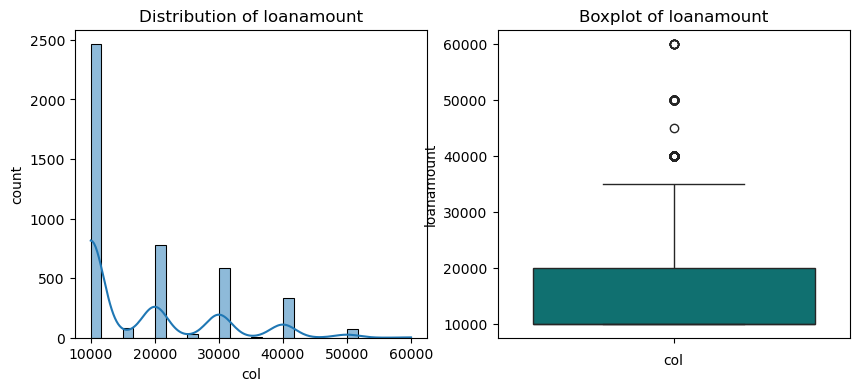

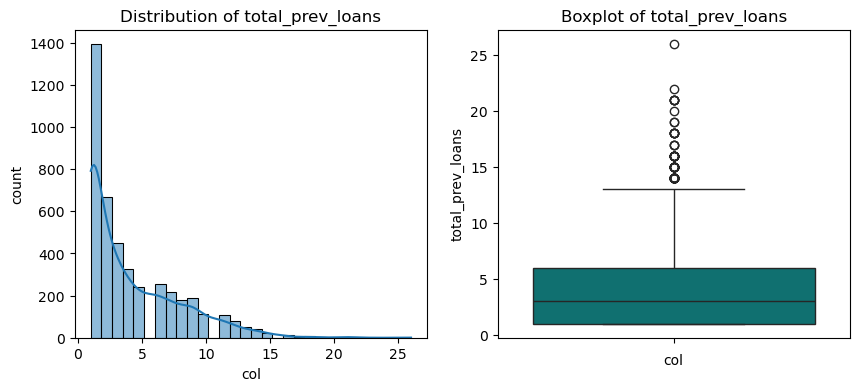

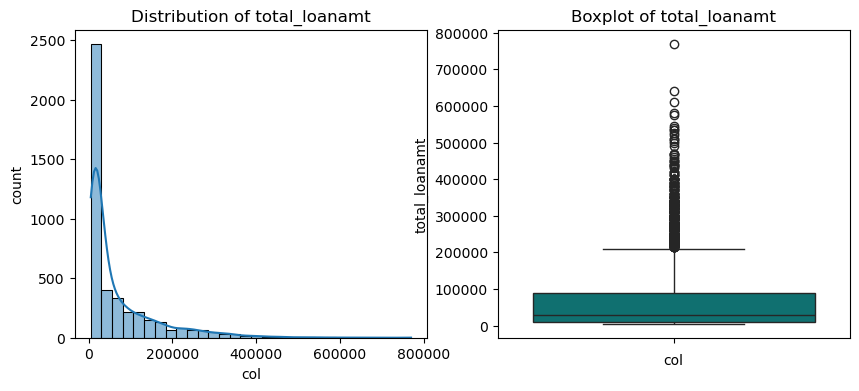

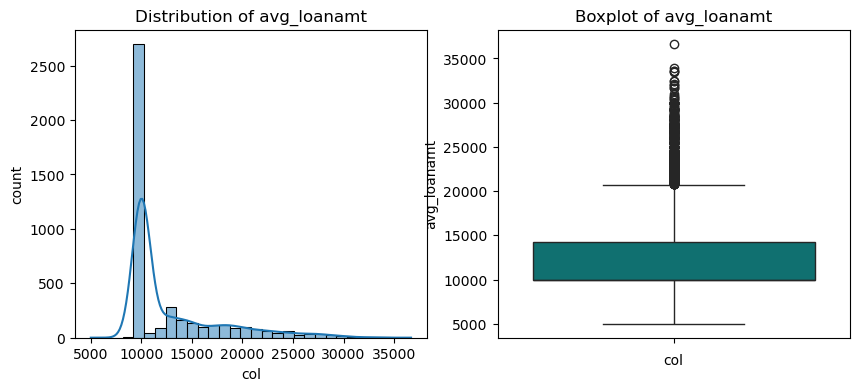

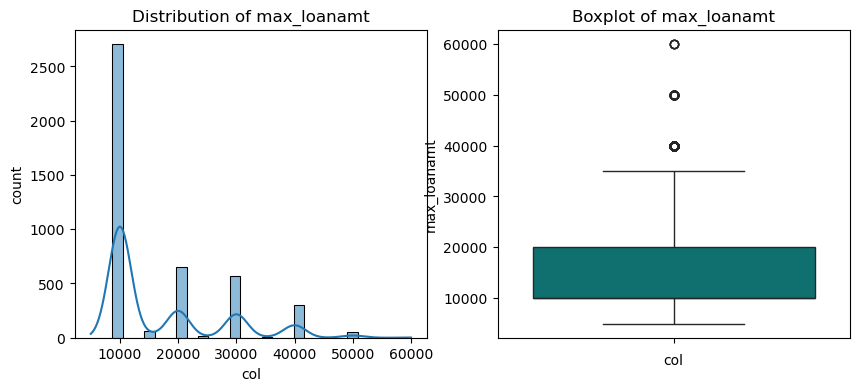

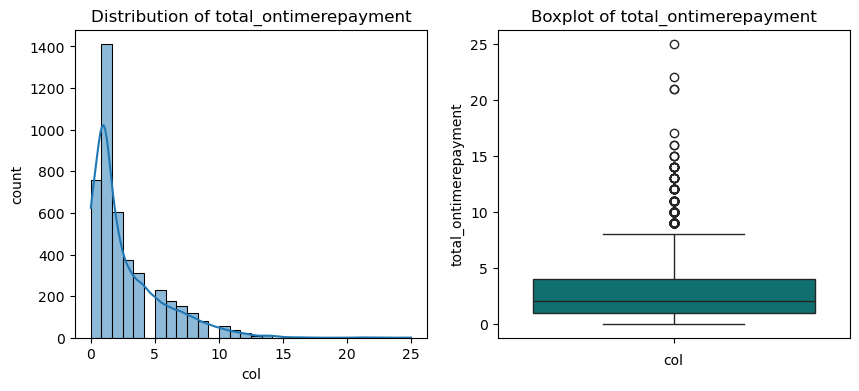

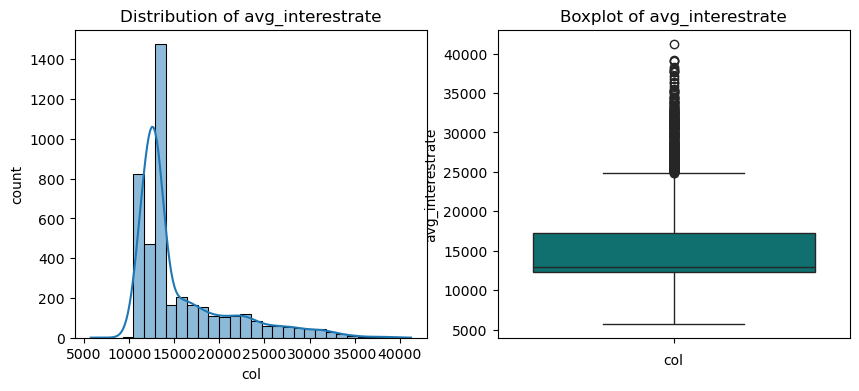

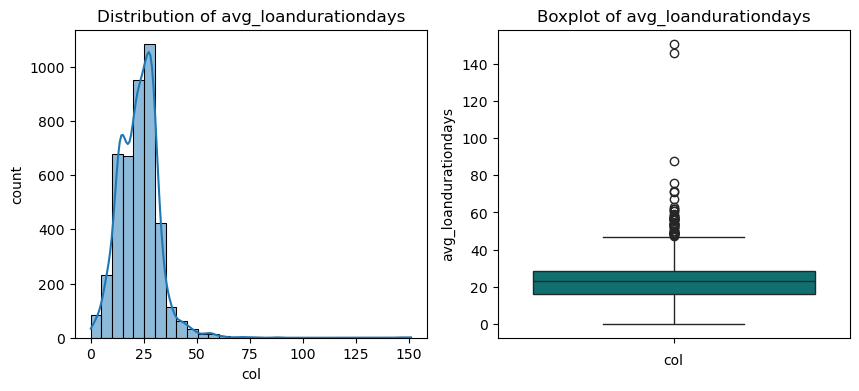

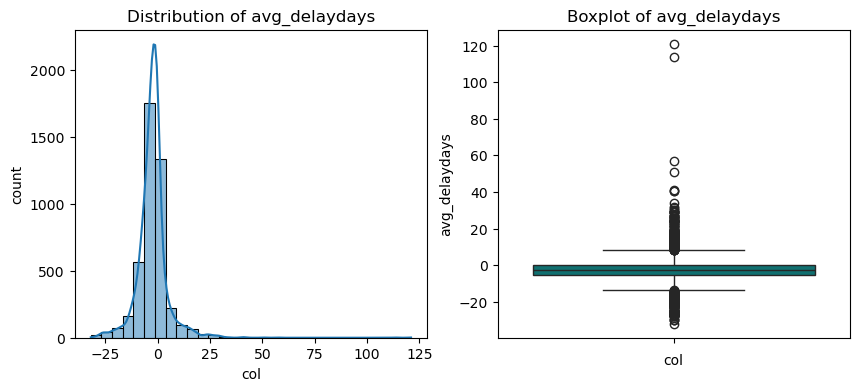

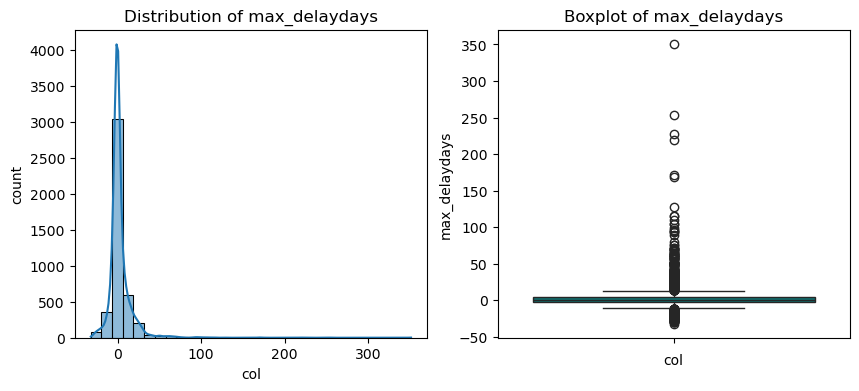

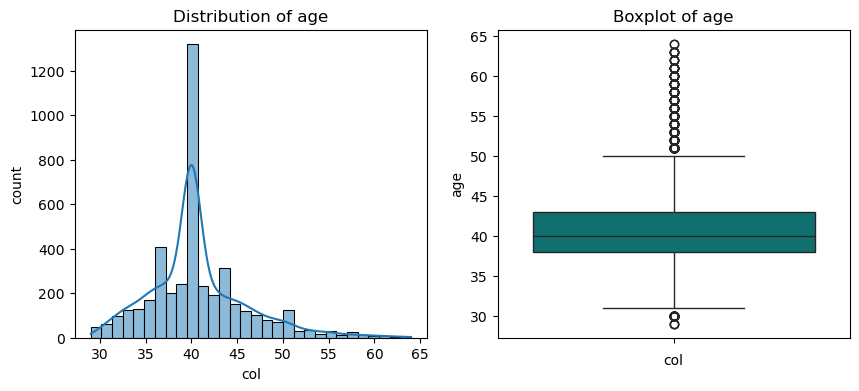

In [75]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    #histogram plot
    plt.subplot(1,2,1)
    sns.histplot(data=df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('col')
    plt.ylabel('count')

#boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[col], color='teal')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('col')

plt.show()

I plotted histograms with KDE curves to see how each numerical variable is distributed. Alongside, I used boxplots to check for outliers. This allowed me to identify whether features like loan amount or total due were normally distributed or skewed, and if extreme values could bias my model. i found all values to be skewed, I didn't think to deal with these because these conditions are consistent in real life application.

<Axes: xlabel='good_bad_flag'>

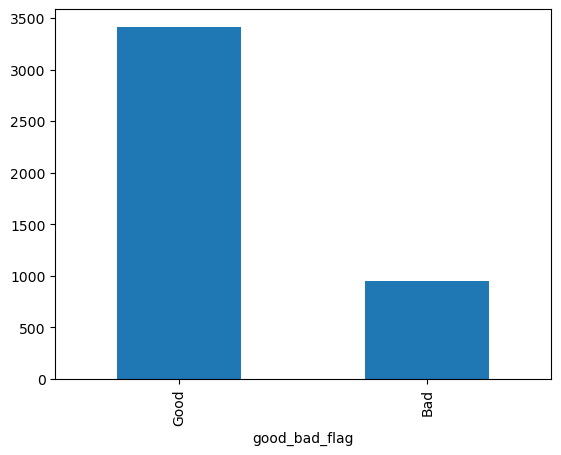

In [76]:
#Target column
df.good_bad_flag.value_counts().plot(kind='bar')

I visualized the target column (good_bad_flag) as a bar chart. This showed me the balance between default (bad loans) and non-default (good loans). Since the dataset is imbalanced, I later applied SMOTE to handle class imbalance before training.

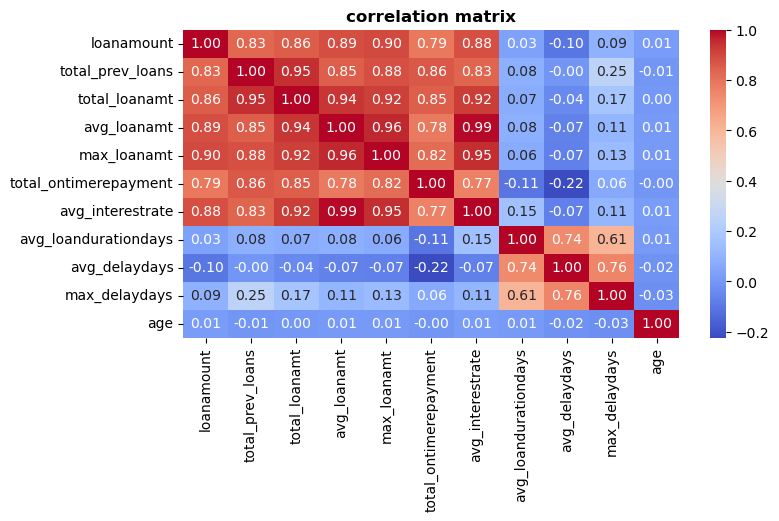

In [77]:
#check correlation matrix
plt.figure(figsize=(8,4))
heatmap = df[num_cols].corr()
sns.heatmap(data = heatmap, fmt ='.2f', annot=True, cmap='coolwarm')
plt.title('correlation matrix', fontweight = 'bold')
plt.show()

From the correlation matrix, loanamt, total_loanamt, avg_loanamt, max_loanamt, avg_interestrate are strongly correlated (0.83- 0.99), keeping all these information can cause multicollinearity. I'm going to drop some of these features to reduce redundancy.

In [78]:
df.drop(columns=['total_loanamt', 'avg_loanamt', 'max_loanamt', 'avg_interestrate'], inplace=True)

In [79]:
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'total_prev_loans',
       'total_ontimerepayment', 'avg_loandurationdays', 'avg_delaydays',
       'max_delaydays', 'age', 'age_missing', 'location_missing'],
      dtype='object')

In [80]:
#i'm transforming my target column because of classifiers like xgboost that i'm going to use, it works with numeric labels
df['good_bad_flag'] = df['good_bad_flag'].map({'Good': 1, 'Bad': 0})

**Data preparation**

In [81]:
x = df.drop(columns=['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'bank_name_clients', 'good_bad_flag'])
y = df['good_bad_flag']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [84]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 0 to 5429
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loanamount                 4368 non-null   float64
 1   totaldue                   4368 non-null   float64
 2   termdays                   4368 non-null   float64
 3   bank_account_type          4368 non-null   object 
 4   longitude_gps              4368 non-null   float64
 5   latitude_gps               4368 non-null   float64
 6   employment_status_clients  4368 non-null   object 
 7   total_prev_loans           4368 non-null   float64
 8   total_ontimerepayment      4368 non-null   float64
 9   avg_loandurationdays       4368 non-null   float64
 10  avg_delaydays              4368 non-null   float64
 11  max_delaydays              4368 non-null   float64
 12  age                        4368 non-null   float64
 13  age_missing                4368 non-null   int32  
 1

**Data preprocessing**


In [85]:
#separate into numerical and categorical column
num_cols = x.select_dtypes(include = np.number).columns.tolist()

cat_cols = x.select_dtypes(include=["object", "category"]).columns.tolist()


In [86]:
x.columns

Index(['loanamount', 'totaldue', 'termdays', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'employment_status_clients',
       'total_prev_loans', 'total_ontimerepayment', 'avg_loandurationdays',
       'avg_delaydays', 'max_delaydays', 'age', 'age_missing',
       'location_missing'],
      dtype='object')

In [87]:
num_cols

['loanamount',
 'totaldue',
 'termdays',
 'longitude_gps',
 'latitude_gps',
 'total_prev_loans',
 'total_ontimerepayment',
 'avg_loandurationdays',
 'avg_delaydays',
 'max_delaydays',
 'age',
 'age_missing',
 'location_missing']

In [88]:
cat_cols

['bank_account_type', 'employment_status_clients']

In [89]:
#create pipeline
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])

cat_pipeline = Pipeline(steps=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [90]:
#apply the preprocessing
preprocessor = ColumnTransformer(transformers=[('num',num_pipeline,num_cols),
                                              ('cat', cat_pipeline, cat_cols)])

In [91]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loanamount', 'totaldue', 'termdays',
                                  'longitude_gps', 'latitude_gps',
                                  'total_prev_loans', 'total_ontimerepayment',
                                  'avg_loandurationdays', 'avg_delaydays',
                                  'max_delaydays', 'age', 'age_missing',
                                  'location_missing']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['bank_account_type',
                                  'employment_status_clients'])])

In [92]:
#define the models
models = {'LogisticRegression': LogisticRegression(),
          'DecisionTree': DecisionTreeClassifier(random_state=42),
          'RandomForest': RandomForestClassifier(random_state=42),
          'Boost': GradientBoostingClassifier(random_state=42),
         'Xgboost': XGBClassifier(random_state=42)}
            

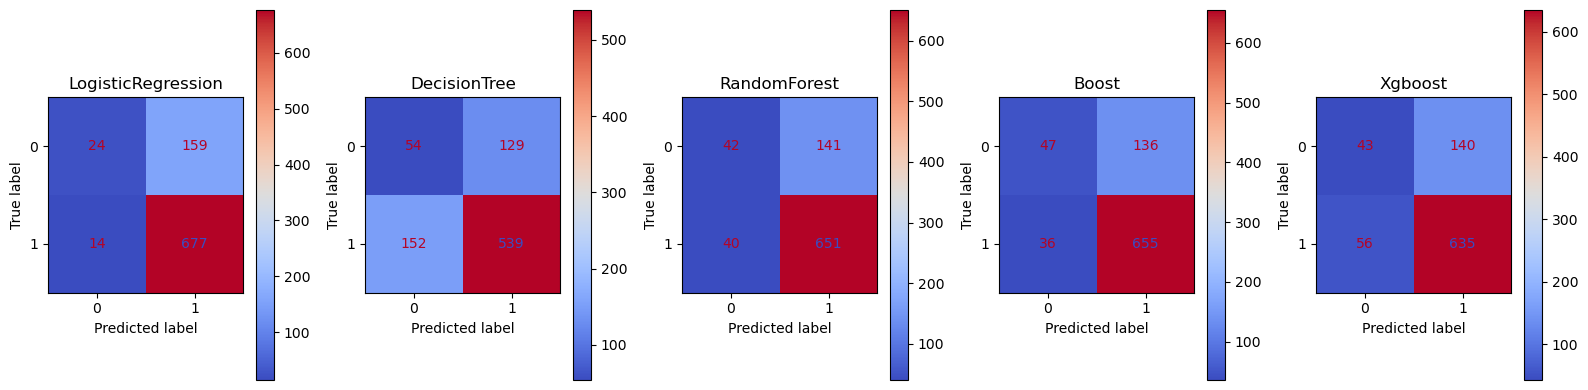

Classification Metrics
                                 0             1             2         3  \
model           LogisticRegression  DecisionTree  RandomForest     Boost   
Train Accuracy            0.789926      0.990841      0.990841  0.825415   
Test Accuracy             0.802059       0.67849      0.792906  0.803204   
Precision                 0.809809      0.806886       0.82197  0.828066   
Recall                     0.97974      0.780029      0.942113  0.947902   
F1                        0.886706       0.79323       0.87795  0.883941   
ROC_AUC                   0.676208      0.535487      0.664405  0.676409   

                       4  
model            Xgboost  
Train Accuracy  0.953635  
Test Accuracy   0.775744  
Precision       0.819355  
Recall          0.918958  
F1              0.866303  
ROC_AUC         0.658193  


In [93]:
#store the result
results = {'model': [],
           'Train Accuracy': [],
           'Test Accuracy': [],
           'Precision': [],
           'Recall': [],
           'F1': [],
           'ROC_AUC': []}

fig, axes = plt.subplots(1,5, figsize=(16,4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(x_train, y_train)

    # predictions
    train_pred = pipeline.predict(x_train)
    test_pred = pipeline.predict(x_test)

    # probabilities (for ROC_AUC)
    test_proba = pipeline.predict_proba(x_test)[:, 1]

    # metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    roc_auc = roc_auc_score(y_test, test_proba)

    # store results
    results['model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1'].append(f1)
    results['ROC_AUC'].append(roc_auc)

    #plot confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='coolwarm')
    ax.set_title(name)

plt.tight_layout()
plt.show()

#print metrics
print('Classification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.T.round(2))

**Balancing The Target Column**

In [94]:
y_train.value_counts()

good_bad_flag
1    2725
0     769
Name: count, dtype: int64

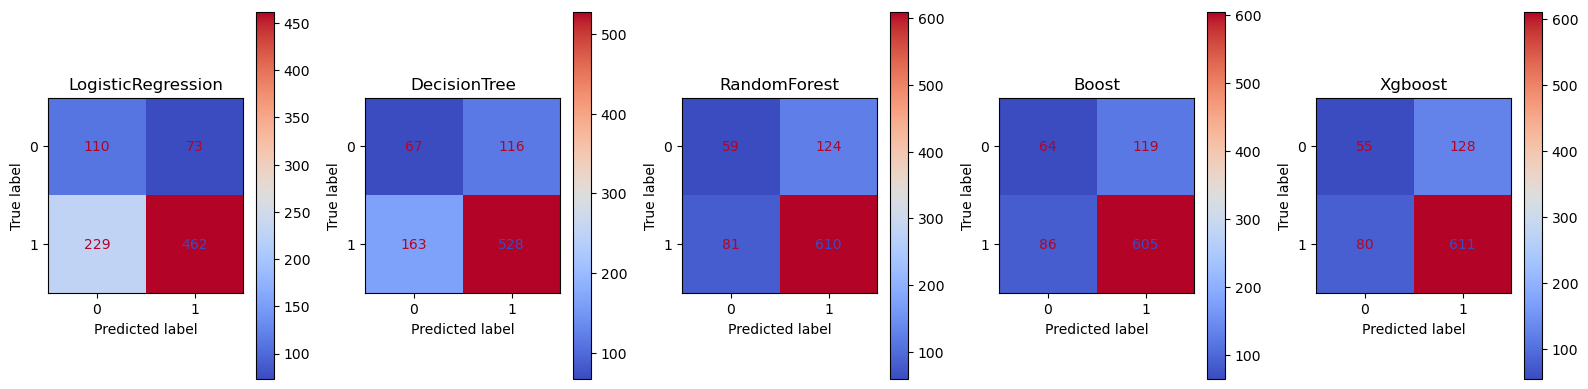

Classification Metrics
                                 0             1             2         3  \
model           LogisticRegression  DecisionTree  RandomForest     Boost   
Train Accuracy            0.651402      0.989983      0.989983  0.799657   
Test Accuracy             0.654462      0.680778      0.765446  0.765446   
Precision                 0.863551      0.819876      0.831063  0.835635   
Recall                    0.668596       0.76411      0.882779  0.875543   
F1                         0.75367      0.791011       0.85614  0.855124   
ROC_AUC                   0.678454      0.565131      0.655243  0.681324   

                       4  
model            Xgboost  
Train Accuracy  0.945335  
Test Accuracy   0.762014  
Precision       0.826793  
Recall          0.884226  
F1              0.854545  
ROC_AUC         0.651218  


In [95]:
#store the result
results = {'model': [],
           'Train Accuracy': [],
           'Test Accuracy': [],
           'Precision': [],
           'Recall': [],
           'F1': [],
           'ROC_AUC': []}

fig, axes = plt.subplots(1,5, figsize=(16,4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    pipeline.fit(x_train, y_train)

    # predictions
    train_pred = pipeline.predict(x_train)
    test_pred = pipeline.predict(x_test)

    # probabilities (for ROC_AUC)
    test_proba = pipeline.predict_proba(x_test)[:, 1]

    # metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    roc_auc = roc_auc_score(y_test, test_proba)

    # store results
    results['model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1'].append(f1)
    results['ROC_AUC'].append(roc_auc)

    #plot confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='coolwarm')
    ax.set_title(name)

plt.tight_layout()
plt.show()

#print metrics
print('Classification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.T.round(2))

When I trained my models before applying SMOTE, I observed that most of them had very high recall but lower precision. This meant that the models were good at catching almost all defaults, but they also raised many false alarms by predicting non-defaulters as defaulters.

After applying SMOTE, the results became more balanced across the models. I noticed that recall generally dropped, meaning the models caught fewer defaults, but precision improved, meaning fewer false positives. For instance, Logistic Regression’s recall reduced from 0.97 to 0.67, but its precision increased from 0.81 to 0.86. Random Forest’s recall also dropped slightly from 0.94 to 0.88, while its precision went up from 0.82 to 0.83. Boost reduced in recall from 0.95 to 0.87, but its precision improved to 0.84 and its ROC AUC improved slightly to 0.68. XGBoost remained fairly stable in accuracy, though its ROC AUC decreased slightly after SMOTE.

In summary, before SMOTE the models were better at detecting defaults but with more false alarms, while after SMOTE the models became more balanced, improving their precision but got lower recall. Among the models, Boost after SMOTE provided the best balance, with a test accuracy of 76%, precision of 0.84, recall of 0.87, and a ROC AUC of 0.68.

**HYperparameter Tuning**

In [96]:
results = []
for depth in [3,4,5,6,7]:
    for leaf in range(1,15,2):
        
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('model', GradientBoostingClassifier(
                random_state=42,
                max_depth=depth,
                min_samples_leaf=leaf
            ))
        ])
        #fit pipeline
        pipe.fit(x_train, y_train)

        #predictions
        train_pred = pipe.predict(x_train)
        test_predict = pipe.predict(x_test)
        test_proba = pipe.predict_proba(x_test)[:, 1]

        #metrics
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        precision = precision_score(y_test, test_pred)
        recall = recall_score(y_test, test_pred)
        f1 = f1_score(y_test, test_pred)
        roc_auc = roc_auc_score(y_test, test_proba)

         # Store results
        results.append({
            'max_depth': depth,
            'min_samples_leaf': leaf,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc
        })

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results) 




In [97]:
results_df


max_depth  min_samples_leaf  train_accuracy  test_accuracy  precision  \
0           3                 1        0.799657       0.762014   0.826793   
1           3                 3        0.800229       0.762014   0.826793   
2           3                 5        0.792788       0.762014   0.826793   
3           3                 7        0.797367       0.762014   0.826793   
4           3                 9        0.798512       0.762014   0.826793   
5           3                11        0.798512       0.762014   0.826793   
6           3                13        0.793646       0.762014   0.826793   
7           4                 1        0.823412       0.762014   0.826793   
8           4                 3        0.828563       0.762014   0.826793   
9           4                 5        0.821122       0.762014   0.826793   
10          4                 7        0.823125       0.762014   0.826793   
11          4                 9        0.817974       0.762014   0.826793   
12          4                11        0.822553       0.762014   0.826793   
13          4                13        0.820836       0.762014   0.826793   
14          5                 1        0.854608       0.762014   0.826793   
15          5                 3        0.851173       0.762014   0.826793   
16          5                 5        0.843732       0.762014   0.826793   
17          5                 7        0.845163       0.762014   0.826793   
18          5                 9        0.848311       0.762014   0.826793   
19          5                11        0.841442       0.762014   0.826793   
20          5                13        0.844305       0.762014   0.826793   
21          6                 1        0.890670       0.762014   0.826793   
22          6                 3        0.881225       0.762014   0.826793   
23          6                 5        0.880653       0.762014   0.826793   
24          6                 7        0.876073       0.762014   0.826793   
25          6                 9        0.878935       0.762014   0.826793   
26          6                11        0.873211       0.762014   0.826793   
27          6                13        0.870063       0.762014   0.826793   
28          7                 1        0.937035       0.762014   0.826793   
29          7                 3        0.919576       0.762014   0.826793   
30          7                 5        0.918432       0.762014   0.826793   
31          7                 7        0.914139       0.762014   0.826793   
32          7                 9        0.912707       0.762014   0.826793   
33          7                11        0.907270       0.762014   0.826793   
34          7                13        0.891528       0.762014   0.826793   

      recall        f1   roc_auc  
0   0.884226  0.854545  0.681324  
1   0.884226  0.854545  0.679806  
2   0.884226  0.854545  0.680814  
3   0.884226  0.854545  0.679881  
4   0.884226  0.854545  0.682768  
5   0.884226  0.854545  0.683440  
6   0.884226  0.854545  0.679181  
7   0.884226  0.854545  0.671506  
8   0.884226  0.854545  0.673903  
9   0.884226  0.854545  0.671819  
10  0.884226  0.854545  0.674254  
11  0.884226  0.854545  0.662839  
12  0.884226  0.854545  0.676682  
13  0.884226  0.854545  0.668323  
14  0.884226  0.854545  0.666366  
15  0.884226  0.854545  0.665595  
16  0.884226  0.854545  0.664903  
17  0.884226  0.854545  0.659541  
18  0.884226  0.854545  0.652286  
19  0.884226  0.854545  0.661997  
20  0.884226  0.854545  0.659577  
21  0.884226  0.854545  0.650012  
22  0.884226  0.854545  0.655702  
23  0.884226  0.854545  0.658027  
24  0.884226  0.854545  0.656580  
25  0.884226  0.854545  0.664927  
26  0.884226  0.854545  0.653512  
27  0.884226  0.854545  0.668588  
28  0.884226  0.854545  0.651333  
29  0.884226  0.854545  0.645975  
30  0.884226  0.854545  0.649795  
31  0.884226  0.854545  0.659577  
32  0.884226  0.854545  0.657972  
33  0.884226  0.854545  0.666896  
34  0.

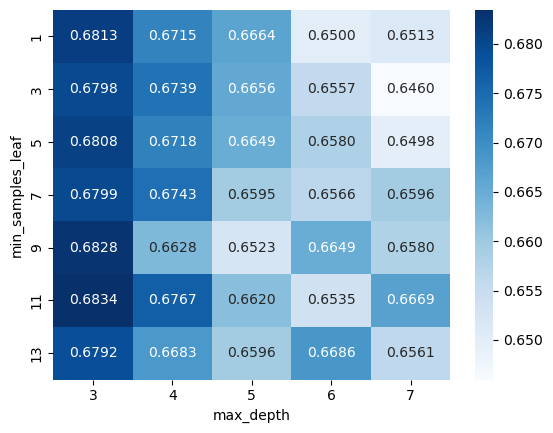

In [98]:
#To transform to pivot
df_scores = results_df.pivot(index='min_samples_leaf', columns='max_depth', values='roc_auc')

#using heatmap to display result
sns.heatmap(df_scores, annot=True, cmap='Blues', fmt='.4f')
plt.show()

I visualized the results of my Decision Tree hyperparameter tuning using a heatmap. By plotting min_samples_leaf against max_depth with ROC_AUC as the score, I could clearly identify which parameter combinations gave the best performance. This allowed me to select the most optimal tree depth and leaf size for my model. from the hyperparameter tuning results, the best parameter setting is max_depth = 3 and min_samples_leaf = 11, because it gave the highest ROC AUC ( 0.683) while keeping the test accuracy at 0.762.